# Multiple Linear Regression
1. Build and interpret two multiple linear regression models
2. Evaluate model fit and coefficient values for both models

In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

In [2]:
computers =  pd.read_csv('../Course Materials/Data/Computers.csv')
computers.head()

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1499,25,80,4,14,no,no,yes,94,1
1,1795,33,85,2,14,no,no,yes,94,1
2,1595,25,170,4,15,no,no,yes,94,1
3,1849,25,170,8,14,no,no,no,94,1
4,3295,33,340,16,14,no,no,yes,94,1


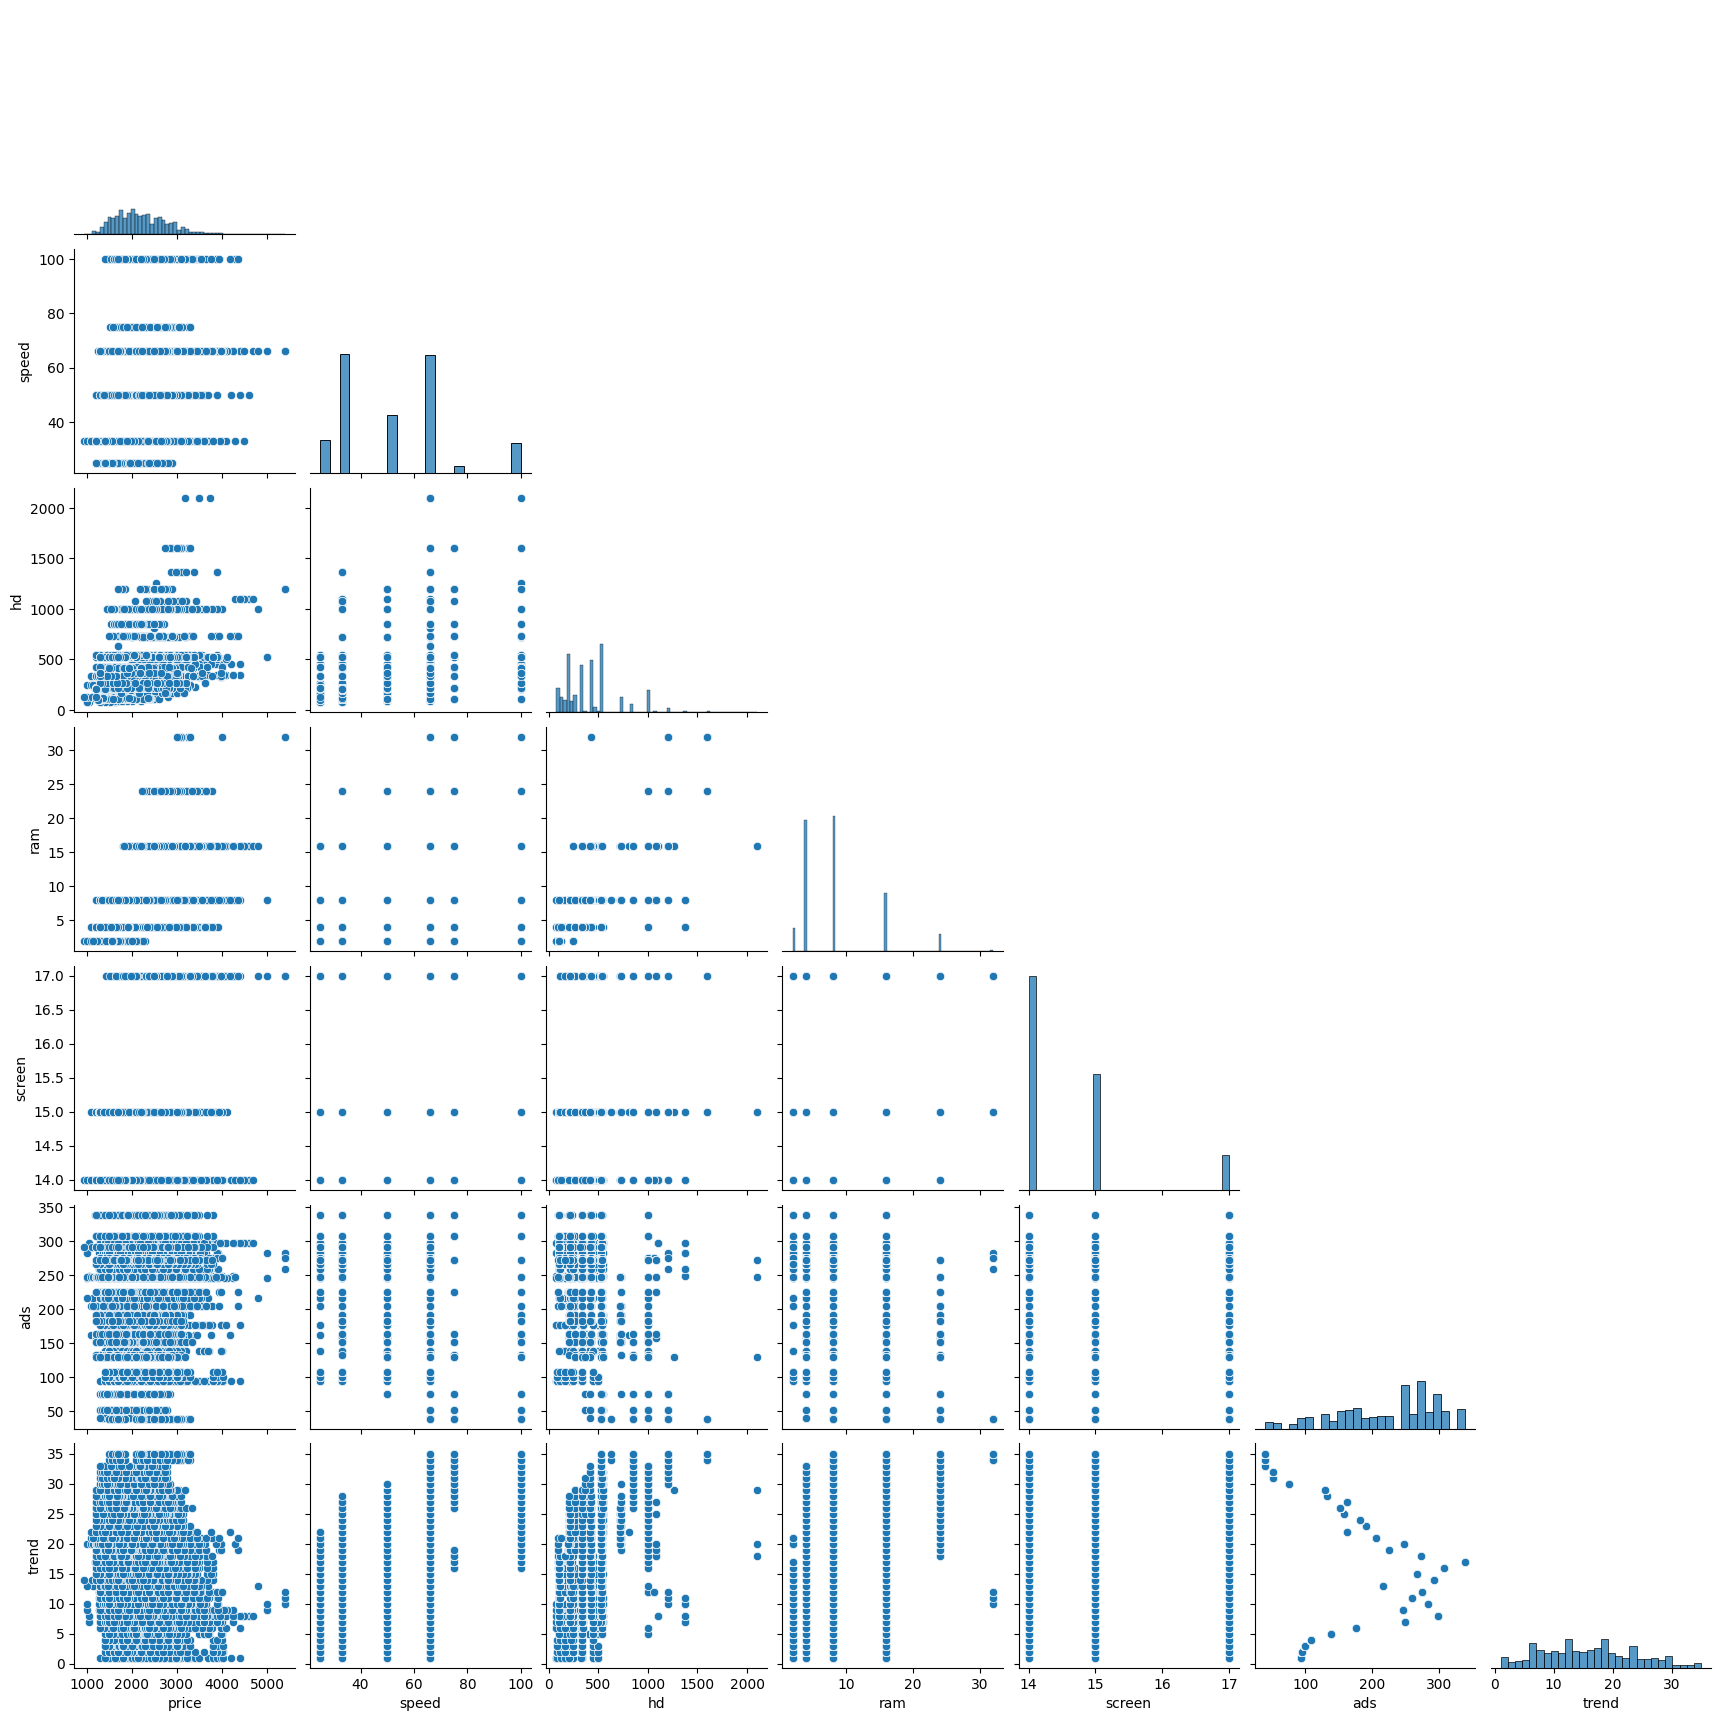

In [4]:
sns.pairplot(computers, corner=True)

In [8]:
computers.corr(numeric_only=True)

,price,speed,hd,ram,screen,ads,trend
price,1.000000,0.300976,0.430258,0.622748,0.296041,0.054540,-0.199987
speed,0.300976,1.000000,0.372304,0.234760,0.189074,-0.215232,0.405438
hd,0.430258,0.372304,1.000000,0.777726,0.232802,-0.323222,0.577790
ram,0.622748,0.234760,0.777726,1.000000,0.208954,-0.181670,0.276844
screen,0.296041,0.189074,0.232802,0.208954,1.000000,-0.093919,0.188614
ads,0.054540,-0.215232,-0.323222,-0.181670,-0.093919,1.000000,-0.318553
trend,-0.199987,0.405438,0.577790,0.276844,0.188614,-0.318553,1.000000


In [10]:
features =['ram', 'hd', 'speed']
X = sm.add_constant(computers[features])

y = computers['price']

model_mlr = sm.OLS(y, X).fit()
model_mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     1595.
Date:                Sun, 14 Dec 2025   Prob (F-statistic):               0.00
Time:                        15:51:50   Log-Likelihood:                -46937.
No. Observations:                6259   AIC:                         9.388e+04
Df Residuals:                    6255   BIC:                         9.391e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1492.1775     15.531     96.078      0.000    1461.732    1522.623
ram           78.2357      1.568     49.880      0.000      75.161      81.310
hd            -0.5357      0.036    -14.973      0.000      -0.606      -0.466
speed          5.8112      0.283     20.553      0.000       5.257       6.365
==============================================================================
Omnibus:                     1647.099   Durbin-Watson:                   1.534
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5010.374
Skew:                           1.351   Prob(JB):                         0.00
Kurtosis:                       6.451   Cond. No.                     1.39e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<Axes: ylabel='None'>

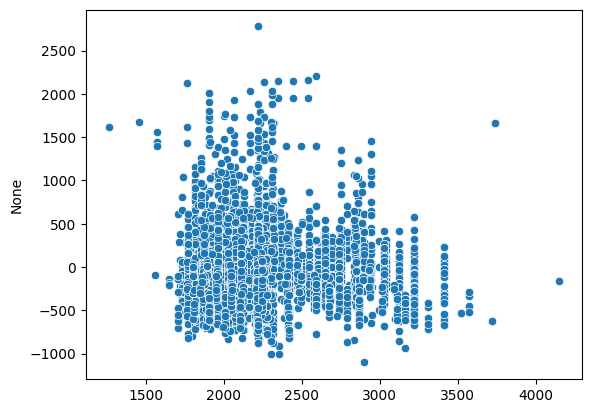

In [11]:
sns.scatterplot(x =model_mlr.predict(), y = model_mlr.resid)